Volatility Drawdown Return anlaysis 실험 (SPY 기준)

페키지 설치

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
# Set Korean font
mpl.rcParams['font.family'] = 'AppleGothic'

# Optional: Avoid minus sign breaking
mpl.rcParams['axes.unicode_minus'] = False

Data load

In [3]:
## based on data/processed/SPY_2018-01-01_2024-12-31_log_return.csv
SPY_df = pd.read_csv("/Users/daeyeop/Desktop/ETF-risk-forcasting/data/processed/SPY_2018-01-01_2024-12-31_log_return.csv", parse_dates=["Date"])
SPY_df.set_index("Date", inplace=True)

수익률 계산은 어떻게?

In [4]:
# 누적 수익률 계산 (그냥 수익률)
SPY_df["cum_return"] = (1 + SPY_df["Return"]).cumprod()
# 누적 수익률 계산 (로그 수익률)
SPY_df["cum_log_return"] = np.exp(SPY_df["Log_Return"].cumsum())


여기서 로그 수익률또한 계산하는것이 좋을 듯함. 일단 데이터 분석을 위해 일반 수익률과 로그 수익률을 둘다 사용, 상황에따라 로그 수익률 사용할것.
- 시간 가산성
- 복리 구조
- 정규분포에 가까움
- 수학적 해석 쉬움
즉 시각화와 모델링, 수학적 처리에 로그 수익률에 좋음

이것을 기반으로 계산할수 있는건...? 
- shap Ratio
- MDD
- CAGR

변동성 계산 (20일 기준)

In [5]:
# 변동성 계산 (20일 기준)
SPY_df["volatility"] = SPY_df["Return"].rolling(window=20).std()
# 변동성 계산 (로그 수익률)
SPY_df["volatility_log_return"] = SPY_df["Log_Return"].rolling(window=20).std()



최대 낙폭 계산

In [6]:
# 최대 낙폭 계산
cum_max = SPY_df["cum_return"].cummax()
SPY_df["drawdown"] = (SPY_df["cum_return"] - cum_max) / cum_max
# 최대 낙폭 계산 (로그 수익률)
cum_max_log_return = SPY_df["cum_log_return"].cummax()
SPY_df["drawdown_log_return"] = (SPY_df["cum_log_return"] - cum_max_log_return) / cum_max_log_return


시각화

Text(0.5, 1.0, '20일 이동 변동성 (로그 수익률)')

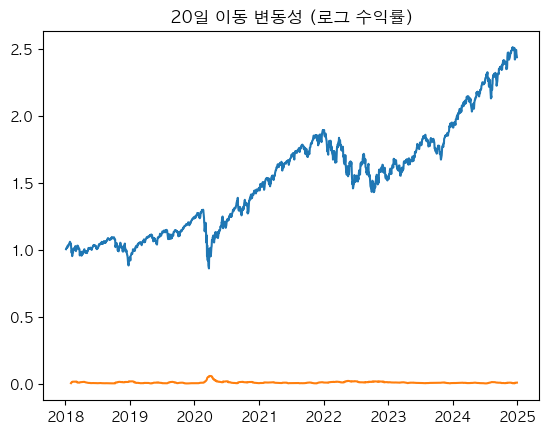

In [7]:
plt.plot(SPY_df["cum_log_return"])
plt.title("누적 수익률 (로그 수익률)")
# 변동성 수익률 (로그 수익률)
plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")

Text(0.5, 1.0, '20일 이동 변동성 (로그 수익률)')

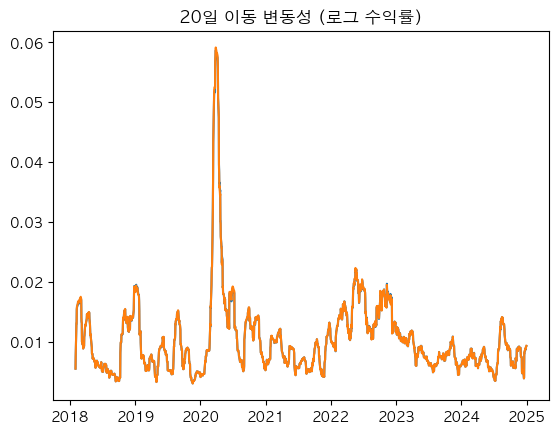

In [8]:
# 변동성 수익률

plt.plot(SPY_df["volatility"])
plt.title("20일 이동 변동성")
# 변동성 수익률 (로그 수익률)

plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")

Text(0.5, 1.0, '20일 이동 변동성 (로그 수익률)')

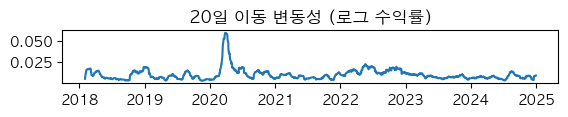

In [9]:
# 변동성 수익률 (로그 수익률)
plt.subplot(6, 1, 4)
plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")

Text(0.5, 1.0, '최대 낙폭 (Drawdown)')

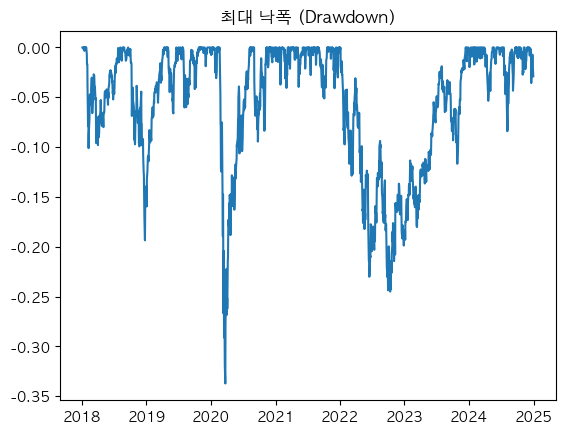

In [10]:
plt.plot(SPY_df["drawdown"])
plt.title("최대 낙폭 (Drawdown)")

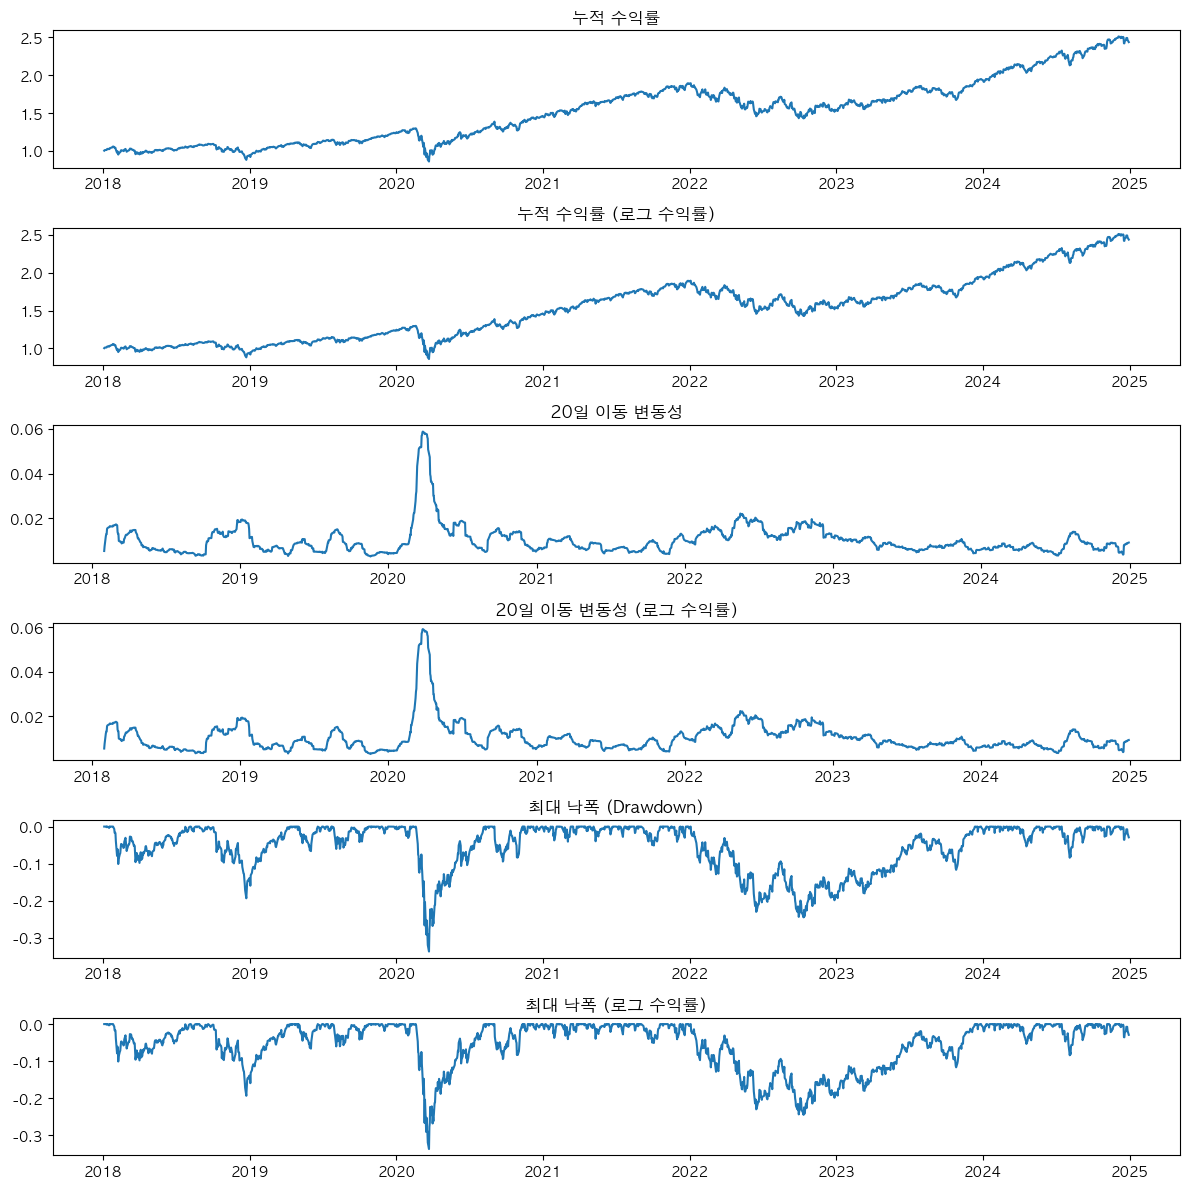

In [11]:
import os
## 시삭화 후 각각의 그래프 .png 로 /data/imag폴더에 저장
img_dir = os.path.join("..", "data", "img")

plt.figure(figsize=(12, 12))

# 누적 수익률
plt.subplot(6, 1, 1)
plt.plot(SPY_df["cum_return"])
plt.title("누적 수익률")

# 누적 수익률 (로그 수익률)
plt.subplot(6, 1, 2)
plt.plot(SPY_df["cum_log_return"])
plt.title("누적 수익률 (로그 수익률)")

# 변동성 수익률
plt.subplot(6, 1, 3)
plt.plot(SPY_df["volatility"])
plt.title("20일 이동 변동성")

# 변동성 수익률 (로그 수익률)
plt.subplot(6, 1, 4)
plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")

# 최대 낙폭
plt.subplot(6, 1, 5)
plt.plot(SPY_df["drawdown"])
plt.title("최대 낙폭 (Drawdown)")
# 최대 낙폭 (로그 수익률)
plt.subplot(6, 1, 6)

plt.plot(SPY_df["drawdown_log_return"])
plt.title("최대 낙폭 (로그 수익률)")
plt.tight_layout()
plt.show()

plt.plot(SPY_df["cum_return"])
plt.title("누적 수익률")
plt.savefig(os.path.join(img_dir, "SPY_cum_return.png"))

plt.plot(SPY_df["cum_log_return"])
plt.title("누적 수익률 (로그 수익률)")
plt.savefig(os.path.join(img_dir, "SPY_cum_log_return.png"))

plt.plot(SPY_df["volatility"])
plt.title("20일 이동 변동성")
plt.savefig(os.path.join(img_dir, "SPY_volatility.png"))

plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")
plt.savefig(os.path.join(img_dir, "SPY_volatility_log_return.png"))

plt.plot(SPY_df["drawdown"])
plt.title("최대 낙폭 (Drawdown)")
plt.savefig(os.path.join(img_dir, "SPY_drawdown.png"))

plt.plot(SPY_df["drawdown_log_return"])
plt.title("최대 낙폭 (로그 수익률)")
plt.savefig(os.path.join(img_dir, "SPY_drawdown_log_return.png"))
plt.close()







In [ ]:
SPY_df.head()

In [ ]:
## 위의 그래프들을 저장후 그래프 데이터와 processed data를 활용해 Transformer 모델을 사용해 어떻게 예측할수 잇을까?
## 모델링에 따른 데이터 전처리가 필요
## 가지고 있는 데이터, 정형데이터, 비정형 데이터. 가능하다면 복합적인 데이터 사용 가능 

## 시계열 데이터 시퀀스 생성이 필요하다
## 우선 적으로 지금 내가 이 데이터들을 feature들과 target들로 나누어 모델링 할수 있는 형태로 만들어야 한다.
## 이후 시계열 데이터 시퀀스 생성이 필요하다.
## 시퀀스 생성 후 모델링 진행
## 모델링 결과 확인 후 결과 시각화
## 결과 시각화 후 결과 해석
## 데이터의 파악이 필요
## SPY_df
SPY_df.head()
## 가지고 있는 특성들 프린트하기
SPY_df.columns


# import tensorflow as tf
## 시계열일 경우 데이터 전처리 방법
## 우선적으로 시퀀스 생성이 필요

def create_sequences(df, sequence_length=60):## 60일 기준으로 시퀀스 생성
    features = df.columns.copy()
    ## 우선적으로 log 와 일반 수익률 두개의 타겟을 생성
    ## 이로써 log 수익률을 통해 더 깔끔하게 추세를 볼수 있음을 확인 할수 있음
    ## 타겟을 생성을 함으로써 동시에 예측 가능! 
    target_columns =['cum_return', 'cum_log_return']
    
    ### 시퀀스 생성 입력 시퀀스는 여러 특성들의 60일치 데이터 활용
    sequences = []
    targets = []
    
    
    
    for i in range(len(df) - sequence_length):
        ## 입력 시퀀스
        sequence = df[features].iloc[i:(i+sequence_length)]
        ## 다중 타겟 시퀀스
        target = df[target_columns].iloc[i+sequence_length]
        ## 시퀀스와 타겟 추가
        sequences.append(sequence)
        targets.append(target)
    
    ## 시퀀스와 타겟 배열로 변환
    ## 그럼 이 데이터 형태는?
    ## 시퀀스는 60개의 데이터가 들어가고 타겟은 2개의 데이터가 들어감
    
    return np.array(sequences), np.array(targets)
## sequence 생성 함수가 잘 형성 되었는지 확인
create_sequences(SPY_df)

## 이후 데이터 정규화와 스케일링이 필요
## 우선적으로 데이터의 missing value 처리가 필요

from sklearn.preprocessing import StandardScaler

def preprocess_data(sequences, targets):
    ## 데이터의 missing value 처리
    sequences = np.nan_to_num(sequences)
    targets = np.nan_to_num(targets)
    
    ## 데이터 정규화
    scaler = StandardScaler()
    sequences = scaler.fit_transform(sequences)
    targets = scaler.fit_transform(targets)
    return sequences, targets


In [ ]:
##ㅍ VIT 는 이미지 패치로 나누고 이를 시퀀스를 변경하여 변환하는 과정이 필요

위의 그래프를 바탕으로 뭘 알수 잇을까?

- 전체적으로 SPY ETF의 장기 성장성 : 2018~ 2024년 동안 꾸준히 우 상향중이며, 최대 낙폭이 100% 이상 증가함. 즉 최대 100% 이상 증가할수 있음.
- 변동성은 2018~2020년 동안 높았으나, 2021년 이후로는 대체로 낮아짐. 즉 변동성이 낮아지면서 안정적인 성장을 보임.
- 최대 낙폭은 2022년 초반에 최대치를 보였으며, 이후로는 감소하는 추세를 보임. 즉 최대 낙폭이 감소하면서 안정적인 성장을 보임.
- 2020년, 2022년 시점에 변동성과 낙폭이 상당함에 있어 이 시기에 코로나(2020) 및 금리인상(2022) 등의 거시적인 외부 요인들을 영향을 미쳤을 가능성이 있음. (관련 데이터들을 추가로 분석해보면 좋을듯)
- 누적 수익률과 누적 로그 수익률의 차이는 크지 않음. 즉 두 수익률의 차이는 크지 않음. 다만 로그 수익률을 통해 더 깔끔하게 추세를 볼수 있음.

1. 누적 수익률
이를 통해, 만일 투자를 했을 시 시간이 지날수록 수익률이 증가하는 것을 확인할 수 있음. 즉 시간이 지날수록 수익률이 증가하는 것을 확인할 수 있음.
- 하지만 2020년 코로나 직후 급락 후 급격한 상승을 보임. 즉 코로나 직후 급락 후 급격한 상승을 보임.
- 2023년 초반 급락 후 급격한 상승을 보임. 즉 2023년 초반 급락 후 급격한 상승을 보임. 급락이후 상당히 강한  상승세를 보임.
2. 누적 로그 수익률
이를 통해, 만일 투자를 했을 시 시간이 지날수록 수익률이 증가하는 것을 확인할 수 있음. 즉 시간이 지날수록 수익률이 증가하는 것을 확인할 수 있음.

3. 20일 이동 변동성 
- 시장의 불안정성, 리스크 수중을 볼수 잇음
- 2020년 초 폭발적인 변동성 증가 => 펜데믹의 공포롤  유추할수 잇음
- 이후 변동성 안정 -> 2023년도부터는 낮은 수준 유지

4. 최대 낙폭 
- 투자자가 겪을수 있는 최대 손실을 시간에 따라 확인할수 있음
- -0.35 수준까지 하락한 시기가 있었음 - 투자금의 35% 손실을 의미
- 낙폭이 깊었던 시기: 2020년 초, 2022년 중반




이를 바탕으로 할수 있는것들
1. 리스크 기반 투자전략 가능 ( 변동성 돌파, MDD 회복 전략)
2. 투자 시기 선택 가능 ( 2023년 이후 낮은 변동성과 안정적인 성장 추세 확인)
3. 로그 수익률 기반으로 Sharpe Ratio 계산 가능 ( 수익률과 변동성의 비율을 계산하여 투자 성과를 평가할 수 있음), Sortino Ratio 계산 가능 ( 수익률과 하락 변동성의 비율을 계산하여 투자 성과를 평가할 수 있음)
, VaR 계산 가능 ( 투자 시간에 따른 최대 손실 확인 가능) 정리후 성능 평가 필요
4. 다른 ETF와 같은 방식으로 비교하여 상대적 투자 분석

리스크별 전략 투자
- 변동성 돌파 전략
- MDD 회복 전략
- 투자 시기 선택 전략
- 리스크 기반 투자 전략


 변동성 돌파 전략 (Volatility Breakout Strategy)
개념:
변동성이 급격히 커지는 시점은 보통 가격 움직임(상승/하락)의 전조가 될 수 있음.

변동성 급등 구간에서 진입, 변동성 하락 시 청산 또는 반대로 활용

예시 전략:
20일 이동 변동성이 일정 임계값을 돌파하면 매수

이후 변동성이 줄어들면 익절

In [ ]:
# 진입 조건: 변동성이 0.02 이상일 때 진입
volatility_threshold = 0.02
signal = (SPY_df['volatility'] > volatility_threshold).astype(int)

# 수익률 계산 (로그 수익률 기반)
strategy_return = SPY_df['log_return'].shift(-1) * signal

1-2. MDD 회복 전략 (Drawdown Recovery Strategy)
개념:
**최대 낙폭 (MDD)**이 깊은 구간은 추세가 회복될 가능성 있음 → 이때 진입

또는, 낙폭이 줄어드는 반전 시점에 진입

In [ ]:
# 진입 조건: drawdown이 -0.1 이하였다가 -0.05 미만으로 회복될 때
condition = (SPY_df['drawdown'] < -0.1) & (SPY_df['drawdown'].shift(1) < SPY_df['drawdown'])
signal = condition.astype(int)
strategy_return = SPY_df['log_return'].shift(-1) * signal


In [ ]:
## 여기서 나온 데이터를 활용해서 VIT 를 모델을 사용하고 자함
## 그를 통해 난 어떤 데이터 전처리를 해야할지 알수 있음
## 현재 내가 가지고 있는데이터의 타입 (데이터 타입 확인)